In [16]:
from pathlib import Path
def get_images(img_path = 'images'):
    img_folder = '..' / Path( img_path)
    if not img_folder.is_dir():
        print("Warning: image folder not found.")
        return []
    return [img_file.as_posix() for img_file in img_folder.iterdir() if img_file.is_file()]




print(get_images())
img_path = get_images()[0]

img_path

['../images/PXL_20250518_141321723.MP.jpg', '../images/PXL_20250520_162958384.jpg', '../images/PXL_20250522_091625928.jpg', '../images/PXL_20250525_093255637.jpg', '../images/PXL_20250525_122758440.jpg', '../images/PXL_20250525_130926840.jpg', '../images/PXL_20250530_162738003.jpg', '../images/PXL_20250613_084136178.jpg', '../images/PXL_20250616_091823288.jpg', '../images/PXL_20250616_120557808.jpg', '../images/PXL_20250619_084903050.jpg', '../images/PXL_20250623_091719489.MP.jpg', '../images/PXL_20250627_161727029.jpg', '../images/PXL_20250630_140205380.MP.jpg', '../images/PXL_20250630_140218779.jpg', '../images/PXL_20250630_160301403.jpg']


'../images/PXL_20250518_141321723.MP.jpg'

Model page: https://huggingface.co/Qwen/Qwen2.5-VL-3B-Instruct

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/Qwen/Qwen2.5-VL-3B-Instruct)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [ ]:
# Use a pipeline as a high-level helper

from transformers import pipeline
#WARNING: Run this only once! (otherwise the GPU will have an OOM error)
pipe = pipeline("image-text-to-text", model="Qwen/Qwen2.5-VL-3B-Instruct")

In [ ]:

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "./IMG_4864.jpg",
            },
            {"type": "text", "text": "Describe this image."},
        ],
    }
]
pipe(text=messages, max_new_tokens = 128)

[{'input_text': [{'role': 'user',
    'content': [{'type': 'image', 'image': './IMG_4864.jpg'},
     {'type': 'text', 'text': 'Describe this image.'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'image', 'image': './IMG_4864.jpg'},
     {'type': 'text', 'text': 'Describe this image.'}]},
   {'role': 'assistant',
    'content': 'The image depicts two individuals in an indoor setting, likely an office or classroom environment. The background features a whiteboard with various diagrams and text written on it. The whiteboard is mounted on a wall that has a window with blinds partially drawn, allowing some natural light to enter the room.\n\n### Detailed Description:\n\n1. **Individuals:**\n   - There are two people in the image.\n   - One person is standing and appears to be explaining something, holding a marker in their right hand.\n   - The other person is seated and smiling, seemingly engaged in the discussion or presentation.\n\n2. **Whiteboard:**\n   - The'}]}]

In [11]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "./Bes.jpg",
            },
            {"type": "text", "text": "Describe this image."},
        ],
    }
]
pipe(text=messages)

[{'input_text': [{'role': 'user',
    'content': [{'type': 'image', 'image': './Bes.jpg'},
     {'type': 'text', 'text': 'Describe this image.'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'image', 'image': './Bes.jpg'},
     {'type': 'text', 'text': 'Describe this image.'}]},
   {'role': 'assistant',
    'content': 'The image shows a person sitting at a desk in front of a computer monitor. The individual is giving'}]}]

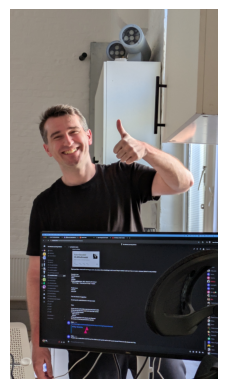

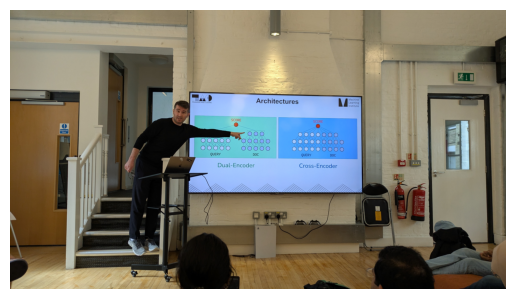

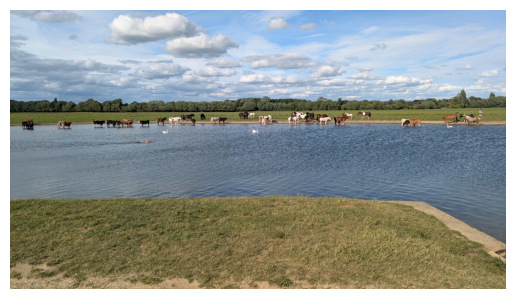

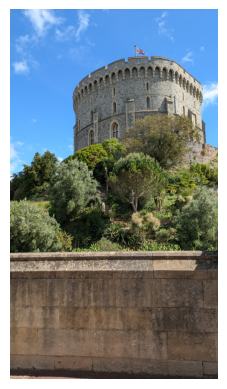

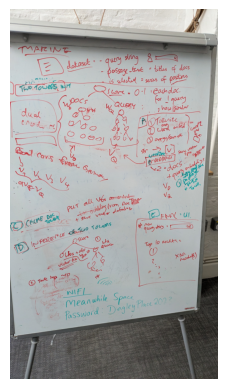

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#display some images
def display_images(num = 5):
    images = get_images()
    if num > len(images):
        raise ValueError("Not enough images to display")
    images = np.random.choice(images, size = num, replace=False)
    for i, im_path in enumerate(images):
        with Image.open(im_path) as image:
            plt.imshow(image)
            plt.axis('off')
            plt.show()

display_images()

In [3]:
# Load model directly
from transformers import AutoProcessor, AutoModelForImageTextToText

#processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")
#model = AutoModelForImageTextToText.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")

In [ ]:
message = [{'role': 'user',
    'content': [{'type': 'image', 'image': './IMG_4864.jpg'},
     {'type': 'text', 'text': 'Describe this image.'}]},
   {'role': 'assistant',
    'content': 'The image depicts two individuals in an indoor setting, likely an office or classroom environment. The background features'}]

img_path
# Corrected message format
corrected_message = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "./IMG_4864.jpg"},
            {"type": "text", "text": "Describe this image."},
        ],
    }
]

# The pipe function in this case expects the input in a list of dictionaries, where each dictionary represent a turn
# in the conversation. For example:
# pipe(text=[{"role": "user", "content": "Describe this image."}])
# pipe(text=[{"role": "user", "content": "Describe this image."}, {"role": "assistant", "content": "The image depicts..."}])
# In this case, the error comes because the list of dictionaries contains the whole conversation, so we have to pass
# it to the pipe function as a list with one element, which is the list of dictionaries itself.

pipe(text=[message], max_new_tokens=500)

TypeError: string indices must be integers, not 'str'